In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Adam

import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
print(DEVICE)

cuda


In [ ]:
class Neural_Network(nn.Module):
  def __init__(self, ):
    super().__init__()
    self.linear1 = nn.Linear(1, 128)
    self.linear2 = nn.Linear(128, 256)
    self.linear3 = nn.Linear(256, 256)
    self.linear4 = nn.Linear(256, 1)

  def forward(self, X):
    X = self.linear1(X)
    X = F.leaky_relu(X)
    X = self.linear2(X)
    X = F.leaky_relu(X)
    X = self.linear3(X)
    X = F.leaky_relu(X)
    X = self.linear4(X)
    return X


neural_network = Neural_Network().to(DEVICE)

In [ ]:
print(neural_network)

Neural_Network(
  (linear1): Linear(in_features=1, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=256, bias=True)
  (linear3): Linear(in_features=256, out_features=256, bias=True)
  (linear4): Linear(in_features=256, out_features=1, bias=True)
)


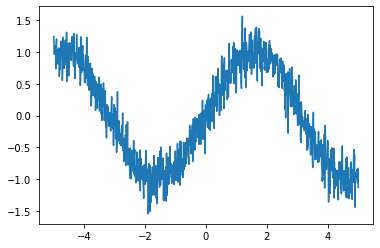

In [ ]:
X = np.linspace(-5, 5, 1000)
Y = np.sin(X) + 0.2*np.random.randn(1000)

plt.plot(X, Y)
plt.show()

In [ ]:
print(type(X), type(Y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
X = torch.tensor(X, dtype = torch.float).to(DEVICE)
Y = torch.tensor(Y, dtype = torch.float).to(DEVICE)

In [ ]:
print(type(X), type(Y))

<class 'torch.Tensor'> <class 'torch.Tensor'>


In [ ]:
dataset = TensorDataset(X, Y)
dataloader = DataLoader(
    dataset,
    batch_size = 16
)

In [ ]:
def loss_fn(y_true, y_pred):
  return torch.mean((y_pred - y_true)**2)

optimizer = Adam(neural_network.parameters(), lr = 0.0001)

In [ ]:
for epoch in range(1000):
  L = 0
  for i, (x_batch, y_batch) in enumerate(tqdm(dataloader)):
    y_pred = neural_network(x_batch.reshape(-1,1))
    l = loss_fn(y_batch, y_pred)
    L += l.item()
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
  L/=(i+1)
  print(f"epoch : {epoch} | loss : {L}")

  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 0 | loss : 0.7718377482619078


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 1 | loss : 0.6138821966827862


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 2 | loss : 0.5830639112326834


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 3 | loss : 0.5544159208971357


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 4 | loss : 0.5052615581819463


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 5 | loss : 0.45330295448620167


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 6 | loss : 0.4264988553015486


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 7 | loss : 0.35381379383542233


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 8 | loss : 0.29442204295524527


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 9 | loss : 0.22819742714128796


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 10 | loss : 0.17227903987088847


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 11 | loss : 0.11511277206360347


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 12 | loss : 0.07949342587519259


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 13 | loss : 0.05912826582789421


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 14 | loss : 0.052364188616001416


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 15 | loss : 0.047814021448767376


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 16 | loss : 0.04591655136928672


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 17 | loss : 0.045103812353715064


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 18 | loss : 0.04468928472626777


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 19 | loss : 0.04468053934119996


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 20 | loss : 0.044379426018586236


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 21 | loss : 0.044204544246433275


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 22 | loss : 0.0439927304193141


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 23 | loss : 0.04418409207747096


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 24 | loss : 0.04420444957675442


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 25 | loss : 0.04410040372657397


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 26 | loss : 0.04381629336802732


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 27 | loss : 0.04398563196734777


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 28 | loss : 0.044282186865097


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 29 | loss : 0.04429667271555416


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 30 | loss : 0.044047546794726736


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 31 | loss : 0.043817445576664


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 32 | loss : 0.04440113517736632


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 33 | loss : 0.04447475445294191


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 34 | loss : 0.04437994658355675


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 35 | loss : 0.044898966889059734


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 36 | loss : 0.045466187483971084


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 37 | loss : 0.04402038419530505


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 38 | loss : 0.04469264011889223


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 39 | loss : 0.04420316761862191


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 40 | loss : 0.04452614409346429


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 41 | loss : 0.049033238123806694


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 42 | loss : 0.0502782128159962


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 43 | loss : 0.06771494409749432


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 44 | loss : 0.08421269322316798


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 45 | loss : 0.12442302458461314


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 46 | loss : 0.06261168361183196


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 47 | loss : 0.05961615162058955


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 48 | loss : 0.05571125568969855


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 49 | loss : 0.07499445348031937


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 50 | loss : 0.12293461334729006


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 51 | loss : 0.08746290934227761


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 52 | loss : 0.12006447175961166


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 53 | loss : 0.11416227240411062


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 54 | loss : 0.0759311296518833


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 55 | loss : 0.13392482523525517


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 56 | loss : 0.17917614119748274


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 57 | loss : 0.08495940885964841


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 58 | loss : 0.0969249407746016


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 59 | loss : 0.11107995662660826


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 60 | loss : 0.06888949214702561


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 61 | loss : 0.06590071326446911


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 62 | loss : 0.07279689157647747


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 63 | loss : 0.06531447424952473


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 64 | loss : 0.052310286237606925


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 65 | loss : 0.0691281259355564


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 66 | loss : 0.06600378051636711


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 67 | loss : 0.04877953614211745


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 68 | loss : 0.058892263809130305


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 69 | loss : 0.060685738329849546


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 70 | loss : 0.04864387506885188


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 71 | loss : 0.05539071923565297


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 72 | loss : 0.059013185253928575


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 73 | loss : 0.04844753733939595


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 74 | loss : 0.05687829334702757


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 75 | loss : 0.06221793482582721


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 76 | loss : 0.04794117834951196


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 77 | loss : 0.05742532267634358


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 78 | loss : 0.0622006349324707


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 79 | loss : 0.04763081344583678


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 80 | loss : 0.05121623396518685


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 81 | loss : 0.052248790594083924


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 82 | loss : 0.04901731830267679


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 83 | loss : 0.04496737022603315


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 84 | loss : 0.0493521373127661


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 85 | loss : 0.05300748499021644


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 86 | loss : 0.04936555586755276


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 87 | loss : 0.04797547771817162


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 88 | loss : 0.04893908995602812


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 89 | loss : 0.049947785597945014


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 90 | loss : 0.05588791049307301


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 91 | loss : 0.056229531380628785


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 92 | loss : 0.054116904824262575


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 93 | loss : 0.06584369388246347


  0%|          | 0/63 [00:00<?, ?it/s]

epoch : 94 | loss : 0.08114281766826198


  0%|          | 0/63 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
y_preds = neural_network(X.reshape(-1, 1))
y_preds = y_preds.detach().cpu().numpy()

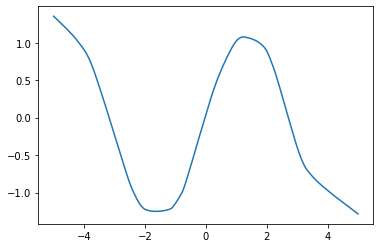

In [ ]:
plt.plot(X.cpu().numpy(), y_preds)